<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Real_Data_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normality Test

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [2]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t -1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)
    return paths

In [4]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
M = 250
I = 250000
np.random.seed(99)

In [5]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [6]:
S0 * math.exp(r * T)

105.12710963760242

In [7]:
paths[-1].mean()

np.float64(105.1169378510267)

Text(0, 0.5, 'index level')

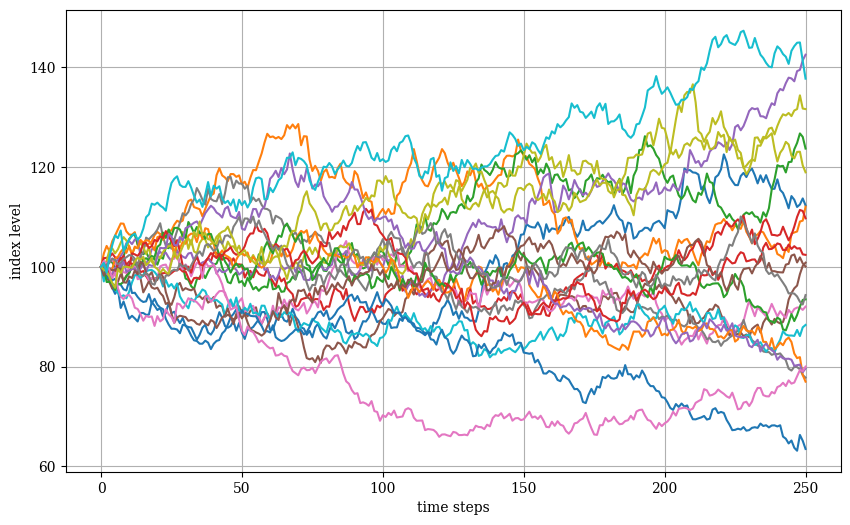

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :20])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [9]:
paths[:, 0].round(4)

array([100.    ,  99.8334,  98.2786,  97.7087,  95.8066,  94.5665,
        95.5016,  91.7422,  93.0194,  91.2828,  89.5864,  90.1712,
        89.6371,  89.0293,  90.7297,  90.7251,  90.3621,  90.4108,
        92.9258,  92.195 ,  91.3298,  91.7002,  90.0565,  90.7157,
        92.7706,  90.6865,  90.9839,  89.6719,  88.69  ,  89.7248,
        88.1375,  87.9138,  87.8159,  86.6478,  85.3779,  86.3755,
        87.7785,  88.3756,  86.7917,  86.3919,  87.2882,  89.05  ,
        90.8917,  89.7667,  88.1079,  87.7784,  88.1122,  89.1069,
        87.1731,  88.7328,  86.7685,  85.5282,  87.3706,  87.5521,
        87.9289,  88.689 ,  89.4819,  90.8959,  90.9288,  89.5221,
        87.3657,  87.4137,  89.0744,  90.6672,  90.4154,  89.2647,
        88.9924,  89.8388,  91.5778,  89.9893,  89.2698,  87.8367,
        87.6015,  86.3565,  87.1559,  85.8533,  87.8455,  88.581 ,
        86.9985,  86.0615,  85.6048,  87.2208,  88.6046,  87.6745,
        89.0051,  90.0755,  89.3168,  86.9336,  86.5996,  87.1

In [10]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [11]:
log_returns[:, 0].round(4)

array([-0.0017, -0.0157, -0.0058, -0.0197, -0.013 ,  0.0098, -0.0402,
        0.0138, -0.0188, -0.0188,  0.0065, -0.0059, -0.0068,  0.0189,
       -0.    , -0.004 ,  0.0005,  0.0274, -0.0079, -0.0094,  0.004 ,
       -0.0181,  0.0073,  0.0224, -0.0227,  0.0033, -0.0145, -0.011 ,
        0.0116, -0.0178, -0.0025, -0.0011, -0.0134, -0.0148,  0.0116,
        0.0161,  0.0068, -0.0181, -0.0046,  0.0103,  0.02  ,  0.0205,
       -0.0125, -0.0187, -0.0037,  0.0038,  0.0112, -0.0219,  0.0177,
       -0.0224, -0.0144,  0.0213,  0.0021,  0.0043,  0.0086,  0.0089,
        0.0157,  0.0004, -0.0156, -0.0244,  0.0006,  0.0188,  0.0177,
       -0.0028, -0.0128, -0.0031,  0.0095,  0.0192, -0.0175, -0.008 ,
       -0.0162, -0.0027, -0.0143,  0.0092, -0.0151,  0.0229,  0.0083,
       -0.018 , -0.0108, -0.0053,  0.0187,  0.0157, -0.0106,  0.0151,
        0.012 , -0.0085, -0.027 , -0.0038,  0.0069, -0.0193,  0.0055,
        0.0193,  0.0159, -0.0008,  0.0088,  0.0176, -0.013 , -0.0146,
        0.0035, -0.0

In [12]:
def print_statistics(array):
    '''  통계치 출력
    인수
    ====
    array : ndarray  통계치를 계산할 자료
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [13]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  62500000.00000
           min        -0.07132
           max         0.07027
          mean         0.00012
           std         0.01265
          skew        -0.00011
      kurtosis         0.00070


In [14]:
log_returns.mean() * M + 0.5 * sigma ** 2

np.float64(0.0499999999999999)

In [15]:
log_returns.std() * math.sqrt(M)

np.float64(0.2000000000000003)

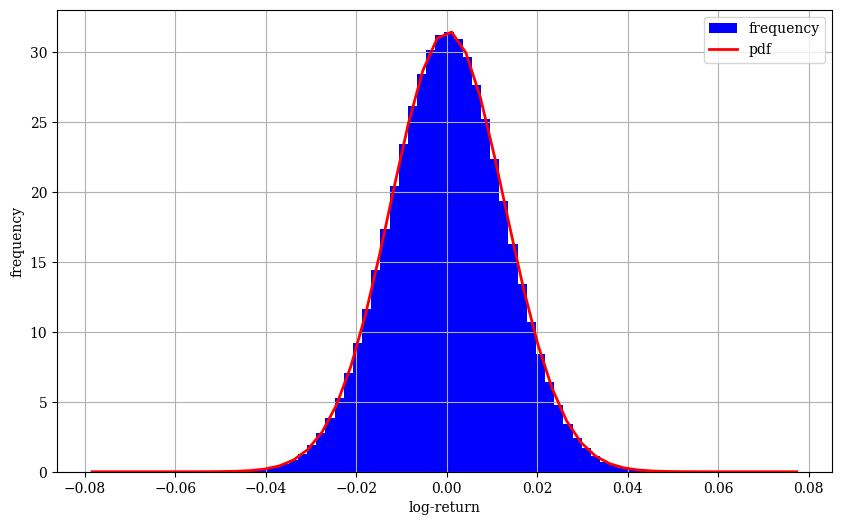

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency', color='b')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

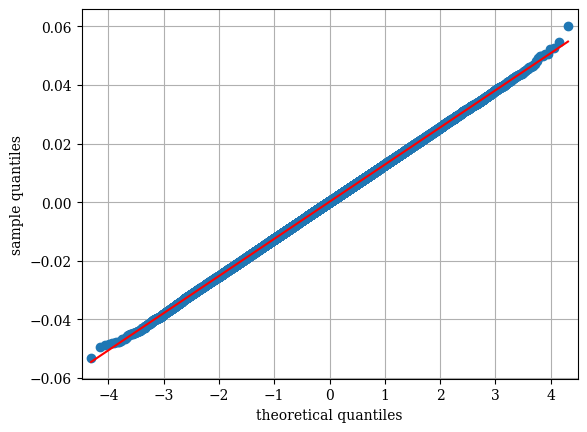

In [17]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [18]:
def normality_tests(arr):
    ''' 주어진 데이타가 정규분포인지 검정
    인수
    ====
    array: ndarray  통계치를 생성할 대상

    '''
    print("Skew of data set  %14.3f" %scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [19]:
normality_tests(log_returns.flatten())

Skew of data set          -0.000
Skew test p-value          0.712
Kurt of data set           0.001
Kurt test p-value          0.260
Norm test p-value          0.495


Text(0.5, 1.0, 'log data')

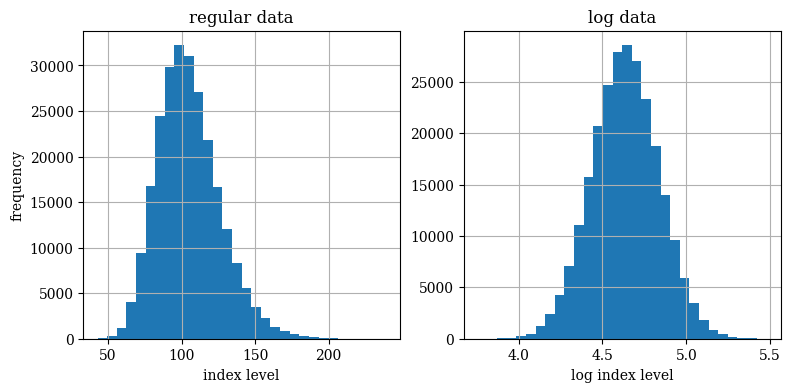

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [21]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.87705
           max       238.96767
          mean       105.11694
           std        21.18256
          skew         0.61126
      kurtosis         0.65475


In [22]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75834
           max         5.47633
          mean         4.63517
           std         0.19951
          skew         0.00034
      kurtosis        -0.00343


In [23]:
normality_tests(np.log(paths[-1]))

Skew of data set           0.000
Skew test p-value          0.945
Kurt of data set          -0.003
Kurt test p-value          0.731
Norm test p-value          0.940


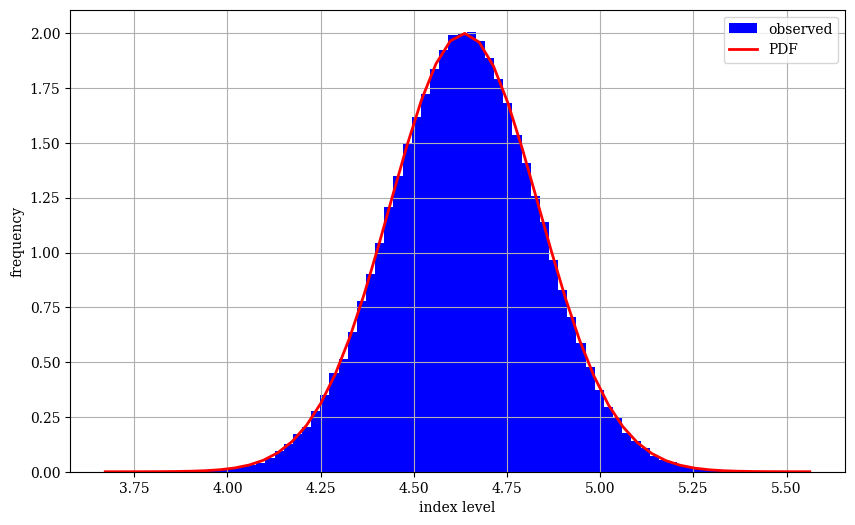

In [24]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True, label='observed', color='b')
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='PDF')
plt.legend()

Text(0, 0.5, 'sample quantiles')

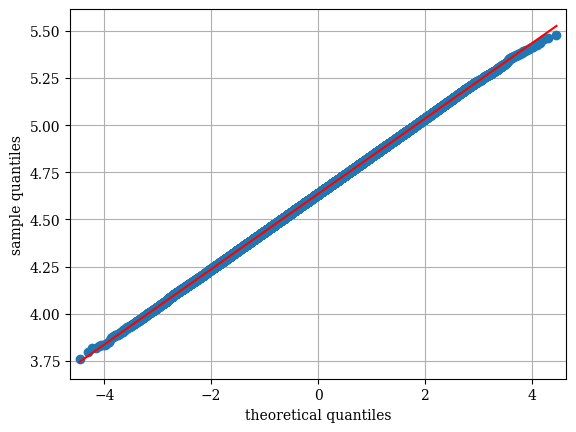

In [25]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

## Real Data Statistics

In [26]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.7 MB/s eta 0:00:00


In [27]:
!pip install --upgrade yfinance

In [28]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import yfinance as yf

In [29]:
from datetime import datetime
start = datetime(2000,1,1)
end = datetime(2025,11,29)

In [30]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI
data5 = yf.download('^HSCE', start, end) # HSCEI
data6 = yf.download('GLD', start, end) # GOLD

/tmp/ipython-input-16671842.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^GSPC', start, end) # S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-16671842.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('^GDAXI',start, end) # DAX
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-16671842.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data3 = yf.download('^KS11', start, end) # KOSPI
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-16671842.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data4 = yf.download('^N225', start, end) # NIKKEI
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-16671842.py:13: FutureWarning: YF.download() has c

In [31]:
data6.head()

Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2004-11-18,44.380001,44.490002,44.070000,44.430000,5992000
2004-11-19,44.779999,44.919998,44.470001,44.490002,11655300
2004-11-22,44.950001,44.970001,44.740002,44.750000,11996000
2004-11-23,44.750000,44.919998,44.720001,44.880001,3169200
2004-11-24,45.049999,45.049999,44.790001,44.930000,6105100


In [32]:
data7 = pd.merge(data1[['Close']], data2[['Close']],left_index=True, right_index=True, how='inner')
data7.columns=['SP500','DAX']

data8 = pd.merge(data3[['Close']], data4[['Close']],left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI']

data9 = pd.merge(data5[['Close']], data6[['Close']],left_index=True, right_index=True, how='inner')
data9.columns=['HSCEI','GOLD']

data10 = pd.merge(data7, data8,left_index=True, right_index=True, how='inner')
data = pd.merge(data10, data9,left_index=True, right_index=True, how='inner')

In [33]:
data.head()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,GOLD
Date,,,,,,
2004-11-18,1183.550049,4178.680176,875.840027,11082.419922,4871.189941,44.380001
2004-11-19,1170.339966,4134.890137,867.030029,11082.839844,4843.720215,44.779999
2004-11-22,1177.239990,4123.979980,849.989990,10849.389648,4830.959961,44.950001
2004-11-24,1181.760010,4125.299805,872.559998,10872.330078,4935.069824,45.049999
2004-11-26,1182.650024,4154.270020,858.119995,10833.750000,4934.390137,45.290001


In [34]:
data.tail()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,GOLD
Date,,,,,,
2025-11-20,6538.759766,23278.849609,4004.850098,49823.941406,9143.339844,374.850006
2025-11-21,6602.990234,23091.869141,3853.260010,48625.878906,8919.780273,374.269989
2025-11-25,6765.879883,23464.630859,3857.780029,48659.519531,9158.309570,380.079987
2025-11-26,6812.609863,23726.220703,3960.870117,49559.070312,9162.370117,383.119995
2025-11-28,6849.089844,23836.789062,3926.590088,50253.910156,9130.179688,387.880005


In [35]:
data.to_csv('stocks.csv')

<Axes: xlabel='Date'>

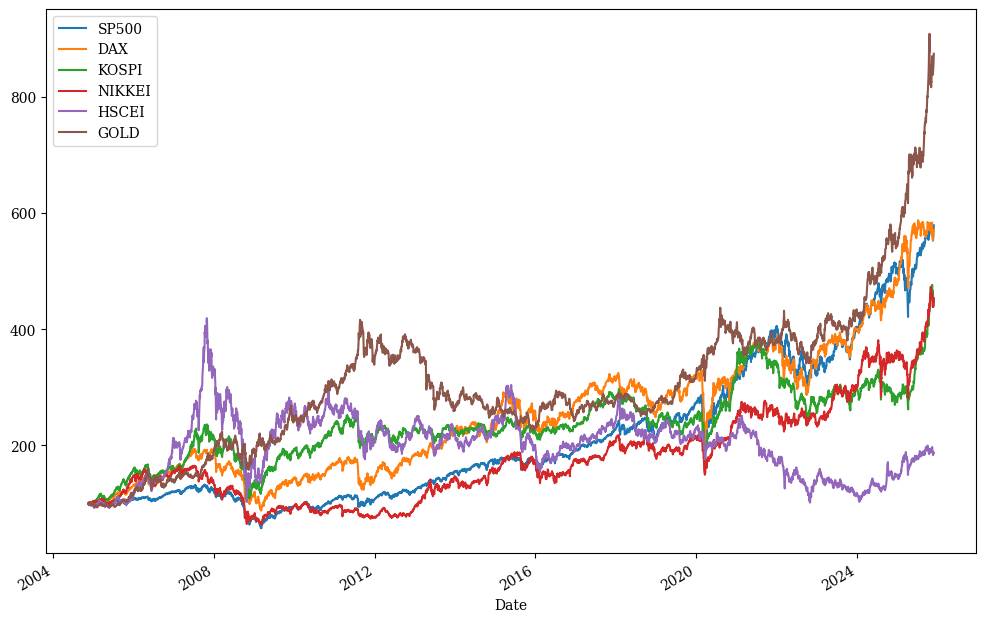

In [36]:
(data / data.iloc[0] * 100).plot(figsize=(12, 8))

In [37]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,GOLD
Date,,,,,,
2004-11-18,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-19,-0.011224,-0.010535,-0.010110,0.000038,-0.005655,0.008973
2004-11-22,0.005878,-0.002642,-0.019849,-0.021289,-0.002638,0.003789
2004-11-24,0.003832,0.000320,0.026207,0.002112,0.021322,0.002222
2004-11-26,0.000753,0.006998,-0.016687,-0.003555,-0.000138,0.005313


array([[<Axes: title={'center': 'SP500'}>,
        <Axes: title={'center': 'DAX'}>],
       [<Axes: title={'center': 'KOSPI'}>,
        <Axes: title={'center': 'NIKKEI'}>],
       [<Axes: title={'center': 'HSCEI'}>,
        <Axes: title={'center': 'GOLD'}>]], dtype=object)

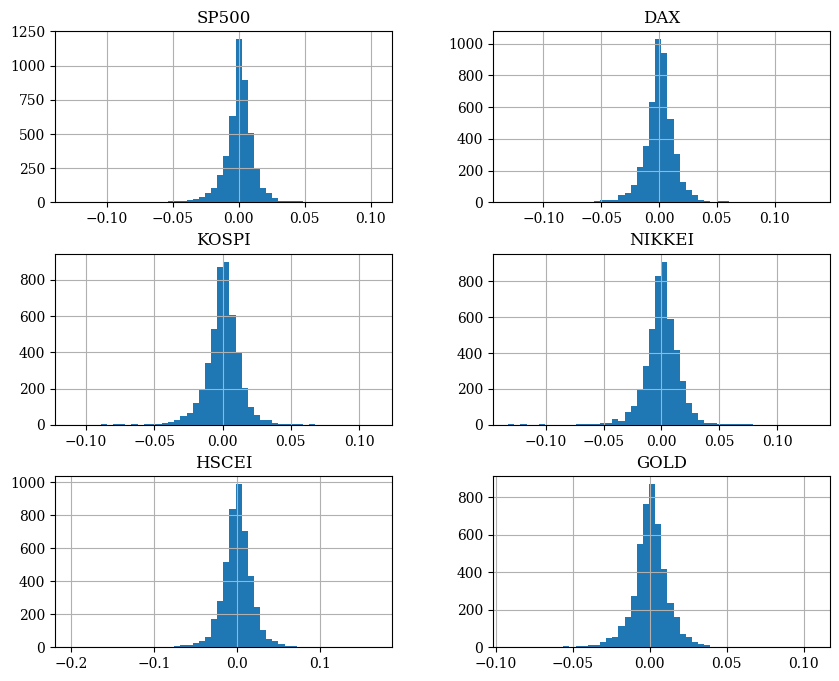

In [38]:
log_returns.hist(bins=50, figsize=(10, 8))

In [39]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'HSCEI', 'GOLD']

In [40]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SP500
------------------------------
     statistic           value
------------------------------
          size      4583.00000
           min        -0.12765
           max         0.10424
          mean         0.00038
           std         0.01280
          skew        -0.54982
      kurtosis        12.16599

Results for symbol DAX
------------------------------
     statistic           value
------------------------------
          size      4583.00000
           min        -0.13055
           max         0.13463
          mean         0.00038
           std         0.01381
          skew        -0.22245
      kurtosis         8.95826

Results for symbol KOSPI
------------------------------
     statistic           value
------------------------------
          size      4583.00000
           min        -0.11172
           max         0.11284
          mean         0.00033
           std         0.01319
          skew        -0.51396
      kurtosis         8.

Text(0, 0.5, 'sample quantiles')

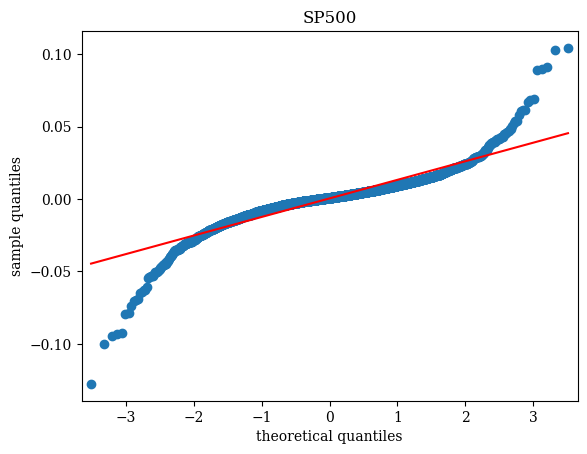

In [41]:
sm.qqplot(log_returns['SP500'].dropna(), line='s')
plt.title('SP500')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

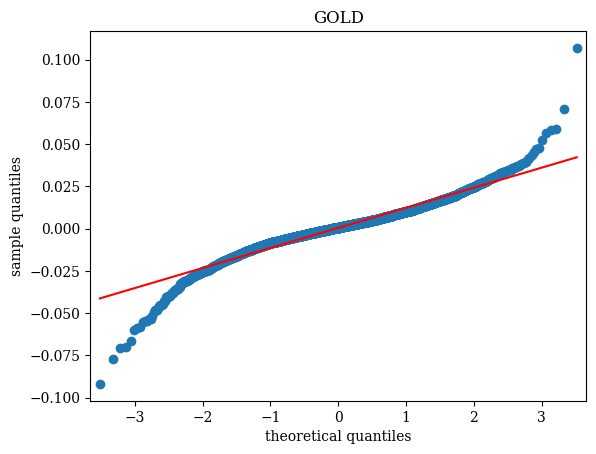

In [42]:
sm.qqplot(log_returns['GOLD'].dropna(), line='s')
plt.title('GOLD')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [43]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SP500
--------------------------------
Skew of data set          -0.550
Skew test p-value          0.000
Kurt of data set          12.166
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol DAX
--------------------------------
Skew of data set          -0.222
Skew test p-value          0.000
Kurt of data set           8.958
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol KOSPI
--------------------------------
Skew of data set          -0.514
Skew test p-value          0.000
Kurt of data set           8.244
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol NIKKEI
--------------------------------
Skew of data set          -0.701
Skew test p-value          0.000
Kurt of data set           9.602
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol HSCEI
--------------------------------
Skew of data set          -0.187
Skew test p-v

## Portfolio Optimization

In [44]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI
data5 = yf.download('^HSI', start, end) # HANGSENG
data6 = yf.download('GLD', start, end) # GOLD

/tmp/ipython-input-2897968012.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^GSPC', start, end) # S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2897968012.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('^GDAXI',start, end) # DAX
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2897968012.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data3 = yf.download('^KS11', start, end) # KOSPI
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2897968012.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data4 = yf.download('^N225', start, end) # NIKKEI
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2897968012.py:13: FutureWarning: YF.downlo

In [46]:
data7 = pd.merge(data1[['Close']], data2[['Close']],left_index=True, right_index=True, how='inner')
data7.columns=['SP500','DAX']

data8 = pd.merge(data3[['Close']], data4[['Close']],left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI']

data9 = pd.merge(data5[['Close']], data6[['Close']],left_index=True, right_index=True, how='inner')
data9.columns=['HANGSENG','GOLD']

data10 = pd.merge(data7, data8,left_index=True, right_index=True, how='inner')
data = pd.merge(data10, data9,left_index=True, right_index=True, how='inner')

In [47]:
data.to_csv('stocks_p.csv')

In [48]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'HANGSENG', 'GOLD']
noa = len(symbols)

In [49]:
rets = np.log(data / data.shift(1))

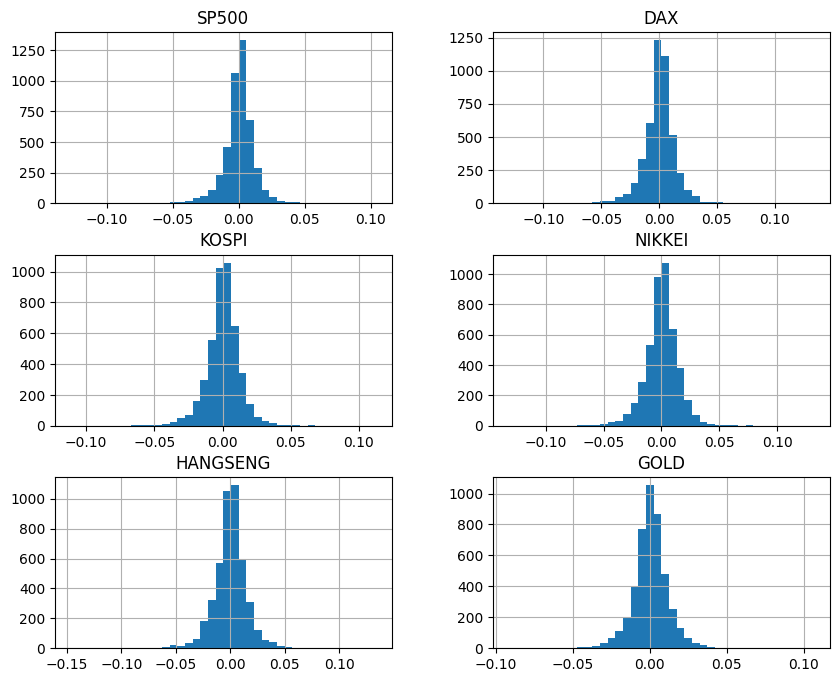

In [ ]:
rets.hist(bins=40, figsize=(10, 8));

In [50]:
rets.mean() * 250

,0
SP500,0.095767
DAX,0.094983
KOSPI,0.081843
NIKKEI,0.082464
HANGSENG,0.034257
GOLD,0.118258


In [51]:
rets.std()*np.sqrt(250)

,0
SP500,0.202355
DAX,0.218405
KOSPI,0.208521
NIKKEI,0.247293
HANGSENG,0.252223
GOLD,0.187808


In [52]:
rets.cov() * 250

,SP500,DAX,KOSPI,NIKKEI,HANGSENG,GOLD
SP500,0.040947,0.027236,0.011251,0.010982,0.014060,0.002267
DAX,0.027236,0.047701,0.018197,0.021621,0.022731,0.001579
KOSPI,0.011251,0.018197,0.043481,0.033832,0.033184,0.003302
NIKKEI,0.010982,0.021621,0.033832,0.061154,0.035675,0.001404
HANGSENG,0.014060,0.022731,0.033184,0.035675,0.063616,0.003807
GOLD,0.002267,0.001579,0.003302,0.001404,0.003807,0.035272


In [53]:
rets.corr()

,SP500,DAX,KOSPI,NIKKEI,HANGSENG,GOLD
SP500,1.000000,0.616261,0.266633,0.219457,0.275473,0.059647
DAX,0.616261,1.000000,0.399573,0.400315,0.412649,0.038483
KOSPI,0.266633,0.399573,1.000000,0.656087,0.630954,0.084307
NIKKEI,0.219457,0.400315,0.656087,1.000000,0.571957,0.030237
HANGSENG,0.275473,0.412649,0.630954,0.571957,1.000000,0.080374
GOLD,0.059647,0.038483,0.084307,0.030237,0.080374,1.000000


<Axes: xlabel='Date'>

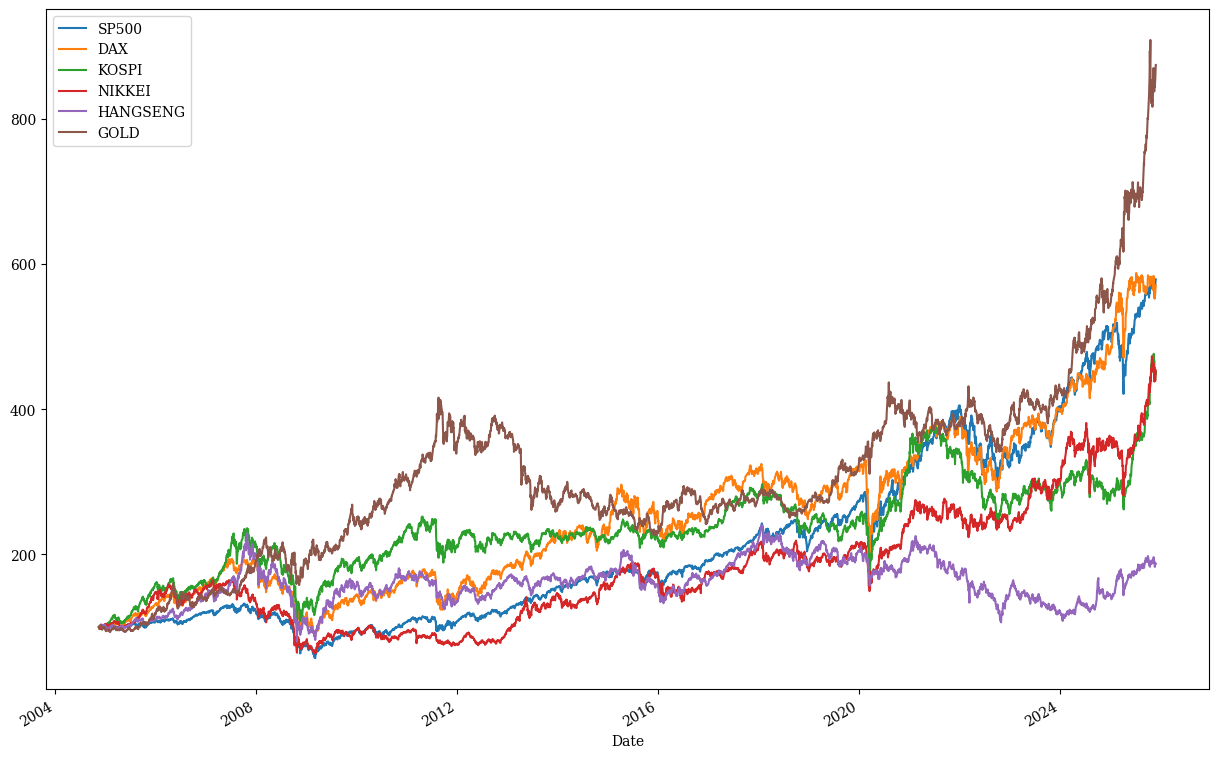

In [54]:
(data / data.iloc[0] * 100).plot(figsize=(15, 10))

#### Basic theory

In [55]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [56]:
weights

array([0.28965403, 0.20871242, 0.01013093, 0.20873199, 0.20897206,
       0.07379857])

In [57]:
weights.sum()

np.float64(1.0)

In [58]:
np.sum(rets.mean() * weights) * 250

np.float64(0.0814914762577412)

In [59]:
np.dot(weights.T, np.dot(rets.cov() * 250, weights))  # 포트폴리오 분산의 기댓값

np.float64(0.02519208649232845)

In [60]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights)))  # 포트폴리오 표준편차(변동성)의 기댓값

0.15872015150045835

In [61]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [62]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [63]:
prets = []
pvols = []
for p in range (25000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

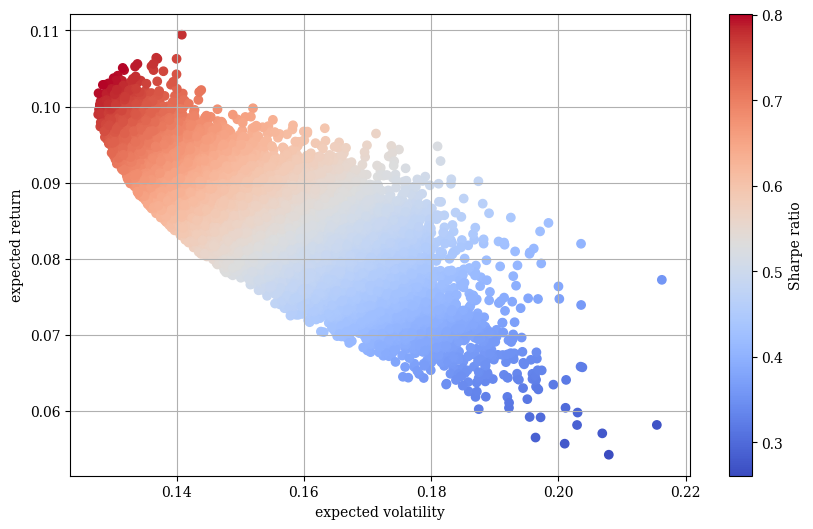

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
pvols = np.array(pvols)

#### 포트폴리오 최적화

In [65]:
import scipy.optimize as sco

In [66]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [67]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [68]:
bnds = tuple((0, 1) for x in range(noa))

In [69]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [70]:
min_func_sharpe(eweights)

np.float64(-0.5790796862982026)

In [71]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)

CPU times: user 87.1 ms, sys: 156 µs, total: 87.2 ms
Wall time: 113 ms


In [72]:
opts

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.8160295442474875
           x: [ 2.317e-01  9.462e-02  1.080e-01  6.695e-02  0.000e+00
                4.987e-01]
         nit: 7
         jac: [-1.843e-04 -6.290e-05 -4.903e-04 -2.938e-04  3.880e-01
                2.433e-04]
        nfev: 49
        njev: 7
 multipliers: [ 2.827e-05]

In [73]:
opts['x'].round(3)

array([0.232, 0.095, 0.108, 0.067, 0.   , 0.499])

In [74]:
port_ret(opts['x']).round(3)

np.float64(0.105)

In [75]:
port_vol(opts['x']).round(3)

np.float64(0.129)

In [76]:
port_ret(opts['x']) / port_vol(opts['x'])

np.float64(0.8160295442474875)

In [77]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [78]:
optv

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.12719548512025566
           x: [ 2.462e-01  7.517e-02  1.704e-01  8.254e-02  9.966e-03
                4.157e-01]
         nit: 9
         jac: [ 1.271e-01  1.273e-01  1.271e-01  1.274e-01  1.267e-01
                1.272e-01]
        nfev: 63
        njev: 9
 multipliers: [ 1.272e-01]

In [79]:
optv['x'].round(3)

array([0.246, 0.075, 0.17 , 0.083, 0.01 , 0.416])

In [80]:
port_ret(optv['x']).round(3)

np.float64(0.102)

In [81]:
port_vol(optv['x']).round(3)

np.float64(0.127)

In [82]:
port_ret(optv['x']) / port_vol(optv['x'])

np.float64(0.8002053119444168)

#### 효율적 투자선

In [83]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [84]:
bnds = tuple((0, 1) for x in weights)

In [85]:
%%time
trets = np.linspace(0.02, 0.1, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 4.99 s, sys: 1 ms, total: 4.99 s
Wall time: 5.15 s


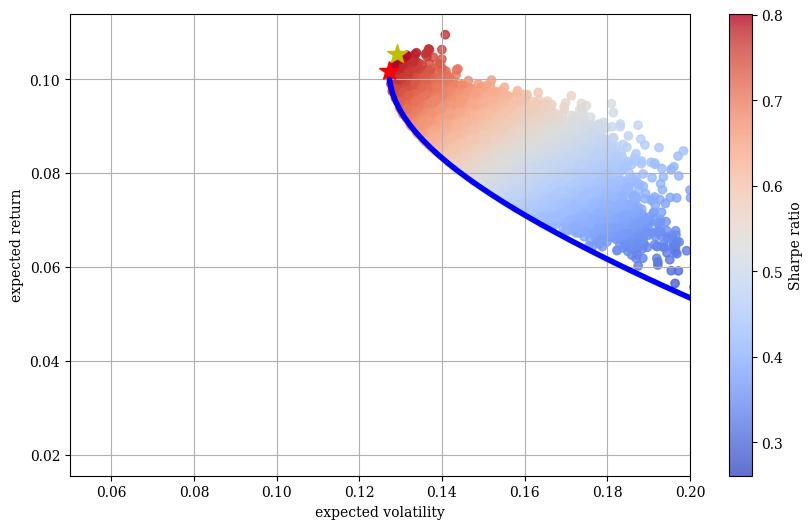

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', alpha=0.8, cmap='coolwarm')  # 무작위 포트폴리오
plt.plot(tvols, trets, 'b', lw=4.0)  # 효율적 투자선
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)   # 최대 샤프지수를 가진 포트폴리오
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)   # 최소 분산 포트폴리오
plt.grid(True)
plt.xlim([0.05, 0.2])
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [87]:
bnds = len(symbols) * [(0, 1),]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [88]:
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}

In [89]:
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252  # annualized
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252 , weights)) ** 0.5  # annualized
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [90]:
opt_weights ={}
for year in range(2010, 2026):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    ow = sco.minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']
    opt_weights[year] = ow.round(4)

In [91]:
opt_weights

{2010: array([0.    , 0.0295, 0.4445, 0.    , 0.    , 0.526 ]),
 2011: array([0.0704, 0.    , 0.    , 0.    , 0.    , 0.9296]),
 2012: array([0.    , 0.3729, 0.    , 0.3601, 0.2185, 0.0484]),
 2013: array([0.7469, 0.0502, 0.    , 0.2029, 0.    , 0.    ]),
 2014: array([0.8833, 0.    , 0.    , 0.0498, 0.    , 0.0668]),
 2015: array([0.    , 0.4339, 0.    , 0.5661, 0.    , 0.    ]),
 2016: array([0.5043, 0.    , 0.1145, 0.    , 0.    , 0.3812]),
 2017: array([0.4504, 0.    , 0.1444, 0.    , 0.1776, 0.2275]),
 2018: array([0., 0., 0., 1., 0., 0.]),
 2019: array([0.3784, 0.0539, 0.    , 0.1613, 0.    , 0.4064]),
 2020: array([0.    , 0.    , 0.4206, 0.    , 0.    , 0.5794]),
 2021: array([0.9365, 0.0635, 0.    , 0.    , 0.    , 0.    ]),
 2022: array([0., 0., 0., 0., 0., 1.]),
 2023: array([0.3889, 0.1156, 0.0267, 0.2489, 0.    , 0.2198]),
 2024: array([0.4077, 0.2616, 0.    , 0.    , 0.0066, 0.3241]),
 2025: array([0.092 , 0.    , 0.4248, 0.    , 0.    , 0.4832])}

### Fama-French 5 Factor

In [92]:
import pandas as pd
import numpy as np

!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.7 MB/s eta 0:00:00


In [93]:
from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web
from linearmodels.asset_pricing import LinearFactorModel

import yfinance as yf
import plotly.graph_objects as go

In [96]:
ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 152 entries, 2012-05 to 2024-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  152 non-null    float64
 1   SMB     152 non-null    float64
 2   HML     152 non-null    float64
 3   RMW     152 non-null    float64
 4   CMA     152 non-null    float64
 5   RF      152 non-null    float64
dtypes: float64(6)
memory usage: 8.3 KB


/tmp/ipython-input-866012173.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-12')[0]
/tmp/ipython-input-866012173.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-12')[0]


In [97]:
ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0) #리스크 프리미엄 계산: 섹터별 수익률 - 무위험 수익률
ff_portfolio_data

/tmp/ipython-input-235473637.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-12')[0]
/tmp/ipython-input-235473637.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-12')[0]
/tmp/ipython-input-235473637.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2012-05,-1.63,-14.62,-10.36,-5.49,-11.15,-9.55,-2.77,-6.48,-14.58,-5.48,-8.57,-7.58,-4.81,-0.89,-1.51,-9.20,-5.33
2012-06,4.15,6.42,5.82,-9.60,-0.85,3.27,5.09,6.22,4.78,0.48,1.32,-5.95,3.49,3.42,2.16,4.65,5.12
2012-07,0.73,-4.08,3.08,1.84,2.19,-1.26,3.05,-2.89,-1.45,1.69,1.32,-0.28,-0.81,3.50,1.65,-1.10,0.16
2012-08,-0.25,5.00,2.38,8.10,6.21,2.77,-0.45,8.88,-1.24,1.16,5.28,2.93,0.47,-3.47,2.56,4.17,2.56
2012-09,1.11,8.62,3.82,0.01,3.25,1.05,2.79,5.58,3.75,4.25,-0.18,2.38,-1.09,2.10,1.68,3.63,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,3.40,-3.58,-3.41,4.83,-1.91,0.15,7.56,0.18,-7.33,4.46,-0.36,-4.91,1.83,4.07,1.23,2.02,2.11
2024-09,0.83,6.86,-3.79,5.14,1.77,3.55,-3.72,6.50,1.45,4.82,2.28,11.89,0.92,4.96,3.32,-0.90,2.23
2024-10,-5.43,-3.64,-0.86,-7.11,-2.32,-3.62,-4.00,-4.33,-1.91,-1.20,0.10,-3.65,-0.83,0.30,-1.30,2.25,-1.24


In [98]:
ff_factor_data = ff_factor_data.drop('RF',axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 152 entries, 2012-05 to 2024-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  152 non-null    float64
 1   SMB     152 non-null    float64
 2   HML     152 non-null    float64
 3   RMW     152 non-null    float64
 4   CMA     152 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


In [99]:
dt=ff_factor_data
dt.to_csv('ffdata.csv')

In [100]:
betas = []
for industry in ff_portfolio_data:
  step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index,industry], #종속변수
              exog=add_constant(ff_factor_data)).fit() #독립변수
  betas.append(step1.params.drop('const'))

In [101]:
betas = pd.DataFrame(betas, columns=ff_factor_data.columns, index=ff_portfolio_data.columns)
betas

,Mkt-RF,SMB,HML,RMW,CMA
Food,0.660561,-0.086238,-0.069290,0.363763,0.500216
Mines,1.084049,0.259676,0.139415,0.223093,0.617152
Oil,1.178966,0.183507,0.934395,-0.230190,0.495953
Clths,1.023098,0.355237,-0.199498,0.634422,0.157317
Durbl,1.111104,0.586120,-0.203950,0.215566,0.189597
Chems,1.099555,0.284357,0.301228,0.197048,0.206285
Cnsum,0.714146,-0.167307,-0.333703,0.222191,0.772678
Cnstr,1.090246,0.452199,0.006104,0.504496,0.012959
Steel,1.418139,0.683210,0.468835,0.490836,0.228664
FabPr,1.009029,0.445871,0.100420,0.127783,-0.142600


In [102]:
lambdas = []
for period in ff_portfolio_data.index:
  step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index],
              exog=betas).fit()
  lambdas.append(step2.params)

In [103]:
lambdas = pd.DataFrame(lambdas, index=ff_portfolio_data.index, columns = betas.columns.tolist())
lambdas

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2012-05,-5.147056,-7.840394,-3.281767,3.170368,-3.405671
2012-06,2.986594,-7.296726,5.176925,-0.460224,4.055404
2012-07,0.939074,-1.552253,-1.750863,-2.207087,1.728561
2012-08,2.458499,1.193777,-0.936165,2.388500,-2.583398
2012-09,2.199607,3.081184,-0.521881,-3.829274,3.732404
...,...,...,...,...,...
2024-08,1.903111,-11.379916,-1.156434,6.479680,-1.424441
2024-09,2.152841,4.782850,-4.798902,1.588980,-3.036129
2024-10,-1.126480,-1.840853,2.434620,-3.316435,-2.367659


In [104]:
model = LinearFactorModel(portfolios=ff_portfolio_data,
                          factors=ff_factor_data)
res = model.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6739
No. Factors:                          5   J-statistic:                    18.982
No. Observations:                   152   P-value                         0.0890
Date:                  Fri, Nov 28 2025   Distribution:                 chi2(12)
Time:                          23:26:41                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.1791     0.3629     3.2491     0.0012      0.4678      1.8905
SMB           -0.7573     0.5101    

In [105]:
window = 24
lambdas_rolling = lambdas.rolling(window).mean().dropna()
lambdas_rolling

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2014-04,1.566670,-0.817643,-0.176121,0.168972,-0.427422
2014-05,1.866114,-0.756537,0.007986,0.181742,-0.400701
2014-06,1.844802,-0.436812,-0.178419,0.148198,-0.510945
2014-07,1.686502,-0.369443,-0.041409,0.275887,-0.616606
2014-08,1.757947,-0.570323,0.012678,0.455477,-0.572665
...,...,...,...,...,...
2024-08,1.235986,-1.781570,0.396513,1.181221,-0.888479
2024-09,1.673027,-1.712770,0.353029,1.756534,-1.110902
2024-10,1.339951,-1.467684,-0.225033,1.188684,-1.342119


In [106]:
colors = ['#ce4912','#fb8500','#042c71','#0b6ab0','#ffb703']
fig = go.Figure()

for factor,i in zip(['Mkt-RF','SMB','HML','RMW','CMA'],range(0,5)):
  fig.add_trace(go.Scatter(x=lambdas_rolling.index.astype('str'), y=lambdas_rolling[factor],mode='lines',line=dict(width=1,color=colors[i]),name=factor))

fig.update_layout(
        title = dict(text = 'Fama-Macbeth Linear Regression',font = dict(size=20,color='black')),
        legend=dict(orientation="h", yanchor="bottom", y=0.93, xanchor="right", x=0.4),
        autosize = True,
        showlegend = True,
        font = dict(size = 8, color = 'black'),
        plot_bgcolor = 'white',paper_bgcolor='white',
        width=1000,height=600,
        xaxis = dict(title = 'Date', showline = True, showgrid = False, showticklabels = True, zeroline=False,mirror = True,
                    linecolor = 'black', linewidth = 0.8,ticks = 'outside'),
        yaxis = dict(title = 'Factor Risk Premium', showline = True, showgrid = False, showticklabels = True,zeroline=False, mirror = True,
                    linecolor = 'black', linewidth = 0.8,ticks = 'outside'),
        annotations=[
        dict(xref='paper',yref='paper',x=1.08,y=1.20,align='right',
            text='Information',showarrow=False,font=dict(size=8,color='red')),
        dict(xref='paper',yref='paper',x=1.08,y=1.18,align='right',
            text='Linkedin: ~/chacehkk',showarrow=False,font=dict(size=8,color='grey')),
        dict(xref='paper',yref='paper',x=1.08,y=1.16,align='right',
            text='Github: ~/hyksun2015',showarrow=False,font=dict(size=8,color='grey')),
        dict(xref='paper',yref='paper',x=1.08,y=-0.08,align='right',
            text='Source: famafrench',showarrow=False,font=dict(size=8,color='black')),
        dict(xref='paper',yref='paper',x=1.08,y=-0.1,align='right',
            text='Data period: 2012.05.01 - 2024.12.31',showarrow=False,font=dict(size=8,color='black'))])